In [3]:

import numpy as np

import sys
sys.path.append("../code/")
from dataloader import APPLIANCE_ORDER, get_train_test
from sklearn.metrics import mean_absolute_error
import os
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../code/')
%matplotlib inline
import itertools
from pathlib import Path

In [4]:
tensor = np.load("../2015-5appliances.numpy.npy")


In [297]:
hvac = tensor[:, 1].copy()
hvac = hvac[hvac>10]

In [299]:
sorted_hvac = np.sort(np.array(hvac))
print(len(sorted_hvac))
print(sorted_hvac[14996])

149962
231.316665649


In [300]:
fridge = tensor[:, 2].copy()
fridge = fridge[fridge>10]

In [303]:
sorted_fridge = np.sort(np.array(fridge))
print(len(sorted_fridge))
print(sorted_fridge[18031])

180313
45.7999992371


In [289]:
dr = tensor[:, 5].copy()
dr = dr[dr>10]

In [291]:
sorted_dr = np.sort(np.array(dr))
print(len(sorted_dr))
print(sorted_dr[2072])

20725
15.5


In [292]:
app = tensor[:, 1]

In [293]:
np.histogram(app[app<100].reshape(1, -1)[0], bins=20)

(array([32104,   714,   180,   157,   137,   134,   140,   902,   112,
          112,   287,   193,   263,   230,   144,   144,   144,   210,
          230,   270]),
 array([  0.        ,   4.99916649,   9.99833298,  14.99749947,
         19.99666595,  24.99583244,  29.99499893,  34.99416542,
         39.99333191,  44.9924984 ,  49.99166489,  54.99083138,
         59.98999786,  64.98916435,  69.98833084,  74.98749733,
         79.98666382,  84.98583031,  89.9849968 ,  94.98416328,  99.98332977]))

Text(0.5,1,'hvac >10')

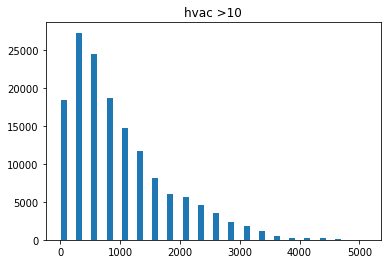

In [296]:
plt.hist(app[app>10].reshape(1, -1)[0], bins=20, width=100)
plt.title("hvac >10")

In [40]:
print(dr.max())
bins = np.arange(0, 4500, 200)
hist, bin_edges = np.histogram(dr.reshape(1, -1)[0], bins=bins)

4364.11669922


In [109]:
dr_home = dr[i].reshape(-1, 1)[0]
dr_home = dr_home[dr_home>0]
dr_home

array([ 0.30000001])

In [124]:
dr.max(axis=1).max(axis=1).min()*0.05

75.135833740234375

In [139]:
tensor[:, 2].

0.0

In [135]:
for i, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    app = tensor[:, i+1].copy()
    print(i, app.max(axis=1).max(axis=1).mean()* 0.05)

0 136.5926835
1 12.5596813202
2 149.887168705
3 33.5576224952
4 15.7314337787


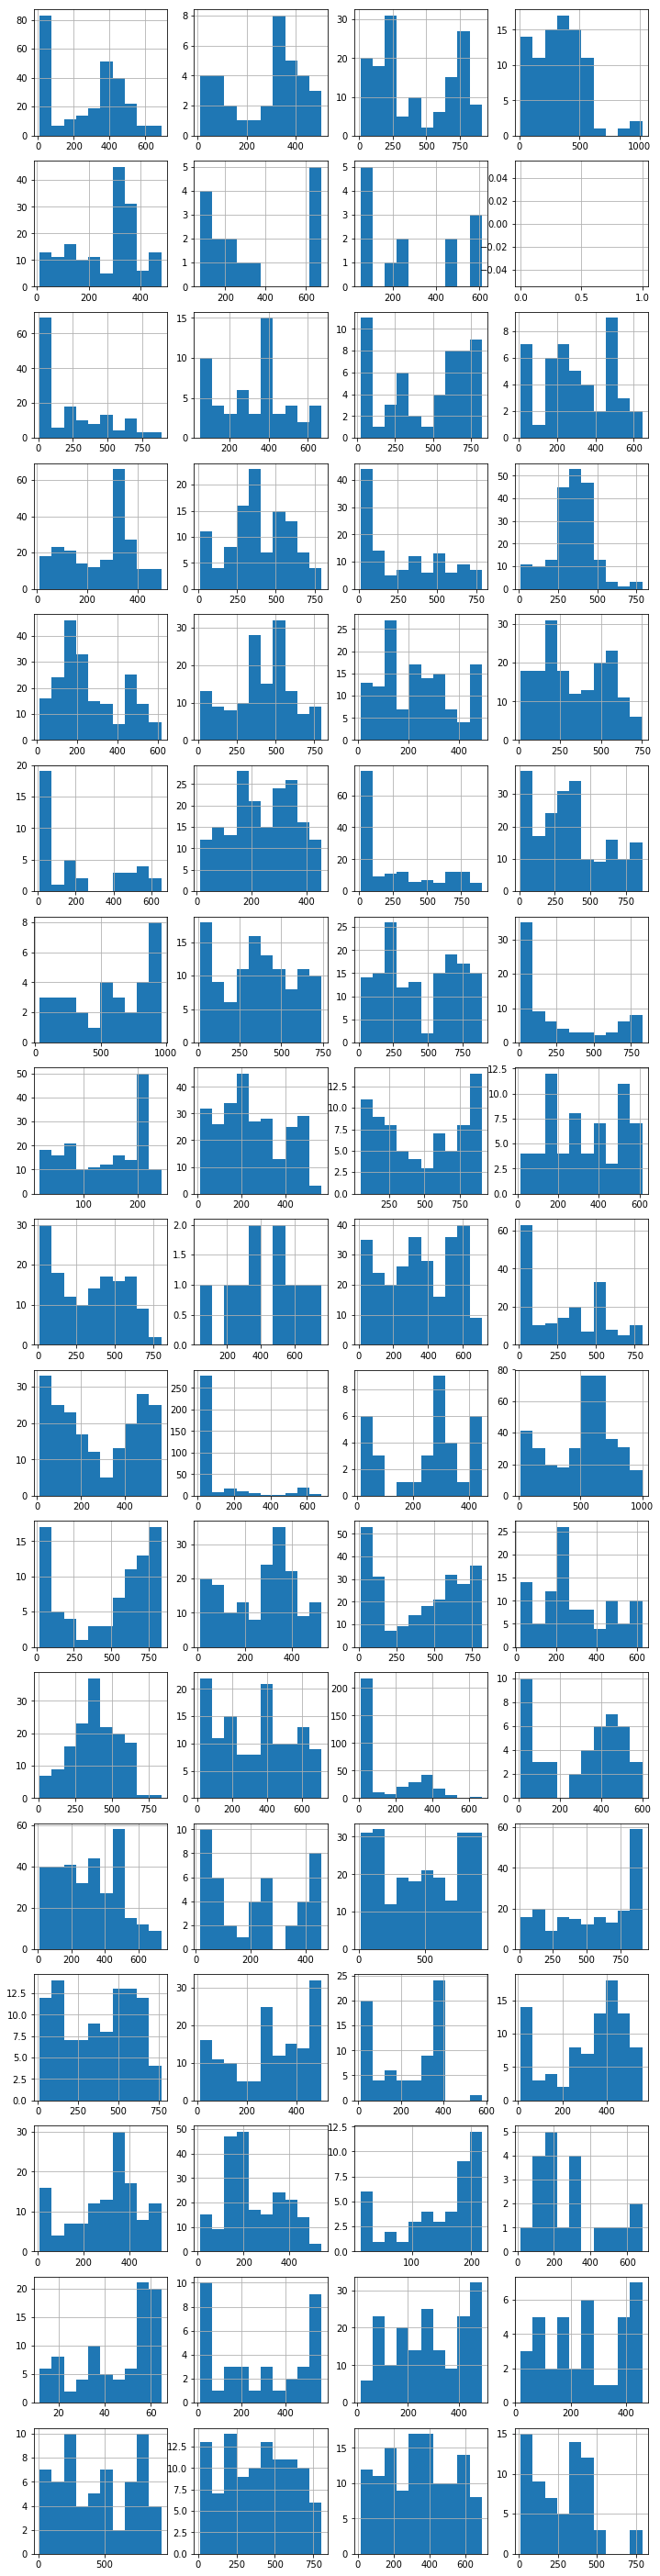

In [8]:
dr = tensor[:, 4]
fig, axes = plt.subplots(ncols=4, nrows = 17, figsize=(12, 51))
ax = axes.flatten()

for i in range(68):
    dr_home = dr[i].reshape(1, -1)[0]
    dr_home = dr_home[dr_home>10]
    pd.Series(dr_home).hist(ax=ax[i])


In [96]:
dr_on = dr[dr>10]
dr_100 = dr_on[dr_on<100]
dr_l_100 = dr_on[dr_on>500]

In [97]:
dr_l_100.mean()

1465.0552671641569

(array([ 1894.,  1697.,  1448.,  1156.,   767.,   393.,   204.,   107.,
           42.,    19.]),
 array([  500.08334351,   886.48667908,  1272.89001465,  1659.29335022,
         2045.69668579,  2432.10002136,  2818.50335693,  3204.9066925 ,
         3591.31002808,  3977.71336365,  4364.11669922]),
 <a list of 10 Patch objects>)

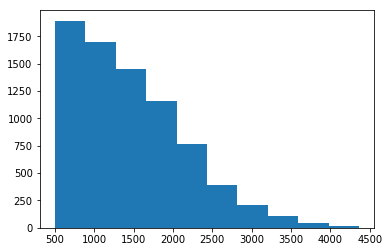

In [98]:
plt.hist(dr_l_100.reshape(1, -1)[0])

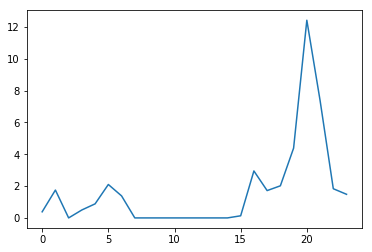

In [82]:
pd.Series(dr[0][110]).plot()

(array([  1.74699000e+05,   2.18000000e+03,   1.91800000e+03,
          1.58800000e+03,   1.20900000e+03,   6.58000000e+02,
          2.87000000e+02,   1.65000000e+02,   5.80000000e+01,
          2.20000000e+01]),
 array([    0.        ,   436.41166992,   872.82333984,  1309.23500977,
         1745.64667969,  2182.05834961,  2618.47001953,  3054.88168945,
         3491.29335937,  3927.7050293 ,  4364.11669922]),
 <a list of 10 Patch objects>)

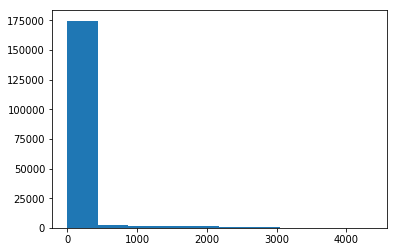

In [3]:
# for dryer
plt.hist(dr.reshape(1, -1)[0])

In [53]:
dw = tensor[:, 4]
dw[dw>0].mean()

117.04597207156934

In [57]:
hvac = tensor[:, 1]
fridge = tensor[: ,2]

In [62]:
hvac.max(axis=1).max(axis=1).mean()*0.1

273.18536700080421

In [63]:
fridge.max(axis=1).max(axis=1).mean()*0.1

25.11936264038086

In [64]:
dr.max(axis=1).max(axis=1).mean()*0.1

299.77433740952438

In [48]:
dw.max(axis=1).max(axis=1).mean()*0.1

NameError: name 'dw' is not defined

In [66]:
mw.max(axis=1).max(axis=1).mean()*0.1

31.462867557301241

In [83]:
on_threshold = {}
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    app = tensor[:, idx+1, :, :]
    on_threshold[appliance] = app.max(axis=1).max(axis=1).mean()*0.14

In [84]:
on_threshold

{'dr': 419.68407237333417,
 'dw': 93.96134298657671,
 'fridge': 35.167107696533208,
 'hvac': 382.45951380112592,
 'mw': 44.048014580221739}

In [55]:
mw = tensor[:, -1]
pd.Series(mw[0][0])

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7     54.966667
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14    10.333333
15     0.000000
16     7.666667
17    22.316668
18    97.783333
19     0.200000
20     0.000000
21     0.100000
22     0.000000
23     0.000000
dtype: float64

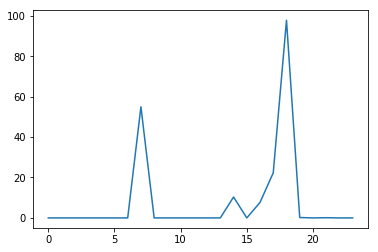

In [43]:
pd.Series(mw[0][0]).plot()

(array([  1.75940000e+05,   1.31700000e+03,   1.18500000e+03,
          1.47000000e+03,   1.10500000e+03,   7.48000000e+02,
          4.66000000e+02,   3.31000000e+02,   2.07000000e+02,
          1.50000000e+01]),
 array([    0.        ,   102.1666687 ,   204.3333374 ,   306.5000061 ,
          408.6666748 ,   510.83334351,   613.00001221,   715.16668091,
          817.33334961,   919.50001831,  1021.66668701]),
 <a list of 10 Patch objects>)

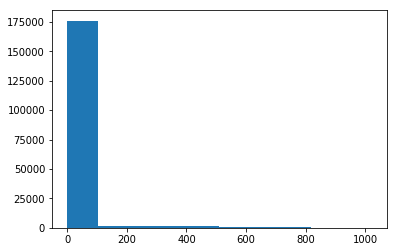

In [10]:
# for dw
dw = tensor[:, 4]
plt.hist(dw.reshape(1, -1)[0])

(array([  1.80444000e+05,   1.85600000e+03,   3.36000000e+02,
          7.60000000e+01,   2.80000000e+01,   3.30000000e+01,
          5.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          1.00000000e+00]),
 array([   0.        ,   98.05666504,  196.11333008,  294.16999512,
         392.22666016,  490.2833252 ,  588.33999023,  686.39665527,
         784.45332031,  882.50998535,  980.56665039]),
 <a list of 10 Patch objects>)

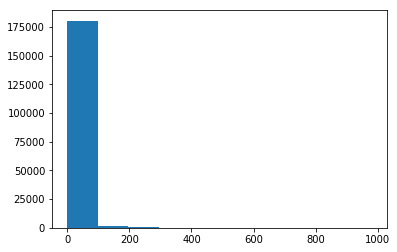

In [11]:
# for mw
mw = tensor[:, 5]
plt.hist(mw.reshape(1, -1)[0])

In [258]:
on_time = {'hvac':5, 'fridge':5, 'dr':5, 'dw':5, 'mw':2}

In [259]:
def myround(x, base=5):
    return int(base * round(float(x)/base))

In [260]:
threshold = {}
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
#     print(idx, appliance)
    app = tensor[:, idx+1].copy()
    print(appliance, app.max(axis=1).max(axis=1).mean())
    threshold[appliance] = (myround(app.max(axis=1).max(axis=1).mean()*on_time[appliance]/60))

hvac 2731.853670008042
fridge 251.1936264038086
dr 2997.743374095244
dw 671.1524499041193
mw 314.6286755730124


In [263]:
threshold

{'dr': 250, 'dw': 55, 'fridge': 20, 'hvac': 230, 'mw': 10}

In [265]:
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    app = tensor[:, idx+1].copy()
    print(appliance, len(app[app>threshold[appliance]])/(68*112*24)*100)
#     print(appliance, app.max())

hvac 73.91018907563026
fridge 97.78153448879551
dr 4.962141106442576
dw 4.072019432773109
mw 11.338519782913165


In [268]:
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):

    app = tensor[:, idx+1].copy()
    print(appliance, app[app>threshold[appliance]].max(), 
          app[app>threshold[appliance]].mean(), app[app>threshold[appliance]].std())

hvac 5099.7333984375 1162.6550888614515 800.2469097389852
fridge 428.6333312988281 88.57623131837084 40.19287685296217
dr 4364.11669921875 1303.6163891658762 756.1532451625538
dw 1021.6666870117188 369.5405413489116 206.45208556130632
mw 980.566650390625 59.495934062493006 53.085576440018514


In [255]:
appliance_order = {'hvac':'HVAC', 'fridge':'Fridge', 'dr':'Dryer', 'dw':'Dishwasher', 'mw':'Microwave'}

In [256]:
distribution = {}
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    app = tensor[:, idx+1].copy()
    
    mask = (app>threshold[appliance])*1
    print(mask.sum())
    distribution[appliance_order[appliance]] = mask.sum(axis=0).sum(axis=0)/(68*112)

135096
178729
9070
7443
20725


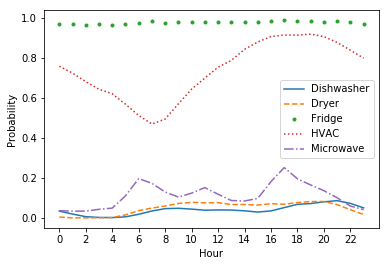

In [269]:
ax = pd.DataFrame(distribution).plot(kind='line', style=['-', '--', '.', ':', '-.'])
ax.set_xlabel("Hour")
ax.set_ylabel("Probability")
# ax.set_title("On power probability")
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16 ,18, 20, 22])
fig = ax.get_figure()
plt.savefig("./figure/On_power_prob.pdf", format='pdf')

In [364]:
day_interval = {}
for idx, appliance in enumerate(['dr', 'dw']):
    app = tensor[:, idx+3]
    mask = (app>threshold[appliance])*1
    day_interval[appliance] = []
    for i in range(68):
        day_interval[appliance].append((np.ediff1d(np.nonzero(mask.sum(axis=2)[i]))-1).mean())
    day_interval[appliance] = np.nan_to_num(np.hstack(day_interval[appliance]))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [248]:
from pylab import hist, show, xticks, yticks

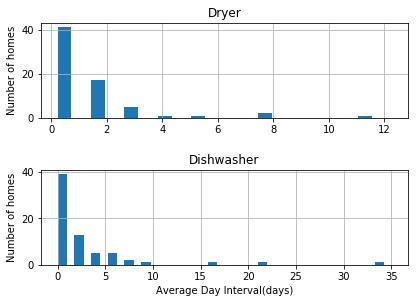

<Figure size 432x288 with 0 Axes>

In [367]:
# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(211)
plt.hist(day_interval['dr'], width=0.5,bins=10)
plt.title('Dryer')
plt.grid(True)
# plt.xlabel("Average Day Interval(days)")
plt.ylabel("Number of homes")

# log
plt.subplot(212)
plt.hist(day_interval['dw'],width=1, bins=20)
plt.title('Dishwasher')
plt.grid(True)

# plt.gca().yaxis.set_minor_formatter(NullFormatter())
# # Adjust the subplot layout, because the logit one may take more space
# # than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.55,
                    wspace=0.35)
plt.xlabel("Average Day Interval(days)")
plt.ylabel("Number of homes")


plt.show()
fig.tight_layout()
plt.savefig("./figure/Average_Day_Interval_dr_dw.pdf", format='pdf')

Text(0,0.5,'Number of homes')

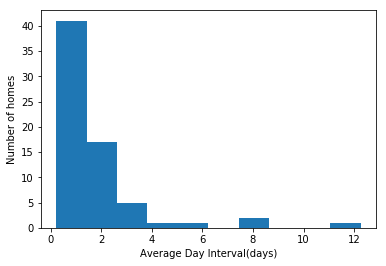

In [174]:
plt.hist(day_interval)
plt.xlabel("Average Day Interval(days)")
plt.ylabel("Number of homes")

In [275]:
tensor = np.load("../2015-5appliances-true-agg-residual.npy")

In [276]:
tensor.shape

(68, 7, 112, 24)

In [277]:
APPLIANCE_ORDER

['aggregate', 'hvac', 'fridge', 'dr', 'dw', 'mw', 'residual']

In [342]:
frac = tensor.mean(axis=2).mean(axis=2).mean(axis=0)
frac = frac/frac[0]


In [343]:
frac[5], frac[6] = frac[6], frac[5]
labels = APPLIANCE_ORDER.copy()
labels[5], labels[6] = labels[6], labels[5]

In [346]:
frac[1], frac[2] = frac[2], frac[1]
labels[1], labels[2] = labels[2], labels[1]

In [347]:
frac

array([1.        , 0.04292022, 0.4304834 , 0.03309639, 0.00763479,
       0.51863327, 0.00449848])

In [462]:
labels

['aggregate', 'fridge', 'hvac', 'dr', 'dw', 'residual', 'mw']

In [463]:
new_labels=['aggregate', 'Fridge', 'HVAC', 'Dryer', 'Dishwasher', 'Residual', 'Microwave']

In [360]:
#1f77b4
color=['#ffbb78', '#c5b0d5', '#f7b6d2', '#c7c7c7', '#aec7e8', '#98df8a']

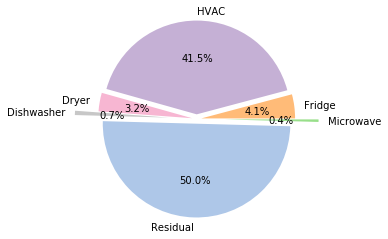

In [464]:
explode = (0.05,0.05,0.05, 0.3, 0.05,0.3)
plt.pie(frac[1:],explode=explode,labels=new_labels[1:] , colors=color,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 0, pctdistance = 0.6)

plt.axis('equal')
fig.tight_layout()


plt.savefig("./figure/proportional.pdf", format='pdf')

In [454]:
dr = tensor[:, 3].copy()
dr_home = dr.reshape(68, -1)
mask = (dr_home>threshold['dr'])*1

days = []
for i in range(68):
    interval = (np.ediff1d(np.nonzero(mask[i]))-1)
    interval = interval[interval>6]
    days.append(interval)    

In [455]:
hist, bins = np.histogram(np.hstack(days), bins=np.arange(0, 800, 1))

In [456]:
hist.shape

(799,)

(1, 120)

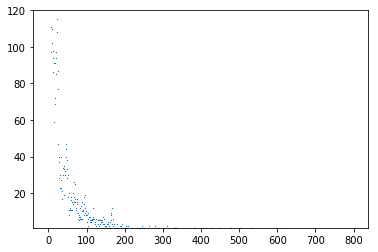

In [460]:
plt.scatter(bins[:-1], hist, s=0.1, marker='*')
plt.ylim(1, 120)

(array([1.219e+03, 4.040e+02, 3.880e+02, 2.910e+02, 3.670e+02, 3.870e+02,
        1.520e+02, 1.200e+02, 9.500e+01, 1.140e+02, 1.390e+02, 1.580e+02,
        8.700e+01, 6.200e+01, 6.000e+01, 6.400e+01, 7.600e+01, 6.500e+01,
        4.400e+01, 2.700e+01, 3.700e+01, 4.200e+01, 5.000e+01, 4.800e+01,
        3.000e+01, 1.800e+01, 2.800e+01, 2.100e+01, 3.100e+01, 1.600e+01,
        9.000e+00, 8.000e+00, 1.700e+01, 1.300e+01, 1.500e+01, 1.700e+01,
        7.000e+00, 9.000e+00, 6.000e+00, 1.500e+01, 3.200e+01, 8.000e+00,
        4.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 6.000e+00, 2.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+0

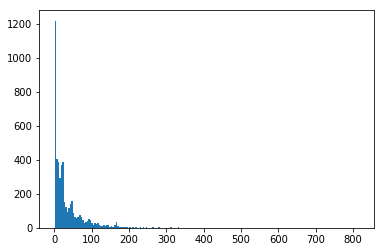

In [399]:
plt.hist(days, bins=200)

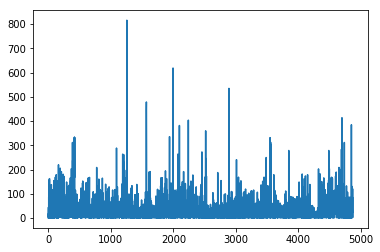

In [394]:
import matplotlib.pyplot as pp
pp.plot(days)
pp.show()

In [ ]:
day_interval = {}
for idx, appliance in enumerate(['dr', 'dw']):
    app = tensor[:, idx+3]
    mask = (app>threshold[appliance])*1
    day_interval[appliance] = []
    for i in range(68):
        day_interval[appliance].append((np.ediff1d(np.nonzero(mask.sum(axis=2)[i]))-1).mean())
    day_interval[appliance] = np.nan_to_num(np.hstack(day_interval[appliance]))